# QF600 Asset Pricing
## Efficient Frontier
### Chia Jun Xian Edmund

Industry_Portfolios.xlsx contains monthly nominal (net) returns for ten industry portfolios (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013.


Use these returns to estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios:

1. Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

2. Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.

    * This graph must have expected (monthly) return on the vertical axis and standard deviation of (monthly) return on the horizontal axis.

    * This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

3. Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

Now suppose that the (net) risk-free rate is 0.13% per month:

4. Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.

5. Briefly explain the economic significance and relevance of the efficient frontier to an investor.

The two frontiers will intersect at single point: the tangency portfolio:

6. Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

7. Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Industry_Portfolio = \
    pd \
        .read_excel('Industry_Portfolios.xlsx')

### 1. Create a table showing the mean return and standard deviation of return for the ten industry portfolios.

In [3]:
mean_ret = \
    pd \
        .DataFrame(Industry_Portfolio.mean(axis= 0)) \
            .rename(columns = {0 : 'mean'})
std_ret = \
    pd \
        .DataFrame(Industry_Portfolio.std(axis= 0)) \
            .rename(columns = {0 : 'std'})

In [4]:
answer_1 = \
    pd \
        .merge(
            mean_ret, 
            std_ret, 
            left_index = True, 
            right_index = True
        ) \
            .iloc[1 : ,]
answer_1

,mean,std
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


### 2. Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios.

* This graph must have expected (monthly) return on the vertical axis and standard deviation of (monthly) return on the horizontal axis.

* This graph must cover the range from 0% to 2% on the vertical axis, in increments of 0.1% (or less).

In [5]:
#Alpha Calculation

# V is the n x n covariance matrix of returns
V = \
    Industry_Portfolio \
        .iloc[: , 1:] \
            .cov() \
                .to_numpy()

# Assuming no redundant assets, returns must be linearly independent and covariance matrix must be invertible ie V inverse exists
# V * V inverse = identity matrix
inv_V = \
    np \
        .linalg \
            .inv(V)

# R is the returns, n x 1
R = \
    answer_1[['mean']] \
        .to_numpy()

# R_prime, 1 x n
R_prime = \
    R \
        .transpose()

R_prime_inv_V = \
    np \
        .matmul(
            R_prime, 
            inv_V
            )

# R' * inv_V * e, e is n x 1
alpha = \
    np \
        .matmul(
            R_prime_inv_V, 
            np \
                .ones(
                    shape = \
                        (R_prime_inv_V.shape[1], 1)
                         )
                )

#Delta Calculation

e_prime_inv_V = \
    np \
        .matmul(
            np \
                .ones(
                    shape = (inv_V.shape[0], 1)
                    ) \
                        .transpose(), 
                        inv_V
                        )

# e' * inv_V * e
delta = \
    np \
        .matmul(
            e_prime_inv_V, 
            np \
                .ones(
                    shape = (e_prime_inv_V.shape[1], 1)
                    )
                    )

#Zeta Calculation

# R' * inv_V * R
zeta = \
    np \
        .matmul(
            np \
                .matmul(
                    R_prime,
                    inv_V
                ),
                R
        )

# print('alpha: ', alpha[0][0]); print('delta: ', delta[0][0]); print('zeta:', zeta[0][0])

In [6]:
#std of return for frontier portfolio

def var(returns):
    variance = \
        1 / delta + \
        (delta / (zeta * delta - alpha**2)) * \
        (returns - alpha / delta)**2
    
    return np.sqrt(variance)[0][0]


In [7]:
#Generate returns from 0-2%

min_variance_frontier =  \
    pd \
        .DataFrame(
            np \
                .arange(0, 2.01, 0.01)) \
                    .rename(columns = {0 : 'Rp'}
                            )

#compute sd of retruns
min_variance_frontier['sd'] = \
    min_variance_frontier \
        .apply(
            lambda x : var(x['Rp']), 
            axis=1
            )

Answwer 2


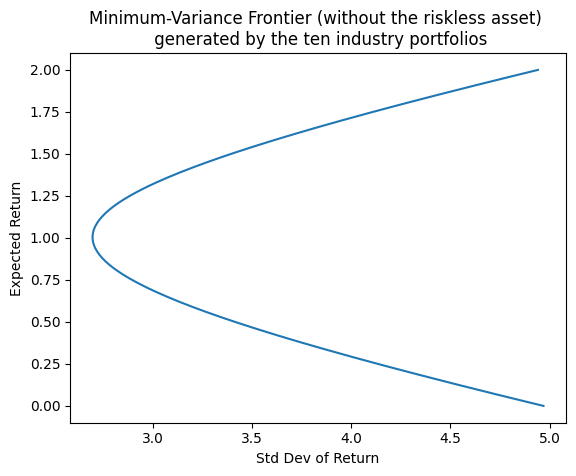

In [8]:
plt \
    .plot(min_variance_frontier['sd'], 
         min_variance_frontier['Rp'])

plt \
    .xlabel('Std Dev of Return')

plt \
    .ylabel('Expected Return')

plt \
    .title('Minimum-Variance Frontier (without the riskless asset) \n generated by the ten industry portfolios')

print('Answwer 2')
plt.show()

### 3. Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

The minimum-variance frontier highlights the portfolios with the lowest amount of risk for varying values of returns.
No attainable portfolio exists on the left of the minimum-variance frontier

Now suppose that the (net) risk-free rate is 0.13% per month:

### 4. Plot the efficient frontier (with the riskless asset) on the same graph as the minimum-variance frontier generated by the ten industry portfolios.


In [9]:
#std for frontier portfolio WITH RISKLESS ASSET
def var_with_riskless(returns, rf):
    
    var_riskless = \
        ((returns - rf) ** 2) / (zeta - 2 * alpha * rf + delta * rf**2)
    
    return np.sqrt(var_riskless)[0][0]


In [10]:
riskfree = 0.13

efficient_frontier_riskless = \
    pd \
        .DataFrame(
            np \
                .arange(0, 2.01, 0.01)) \
                    .rename(
                        columns = {0 : 'Rp'}
                            )


efficient_frontier_riskless['sd'] = \
    efficient_frontier_riskless \
        .apply(
            lambda x : var_with_riskless(x['Rp'], riskfree), 
            axis = 1
            )

#filter for top halve of frontier with riskless asset 
efficient_frontier_riskless['sd'] = \
    np \
        .where(efficient_frontier_riskless['Rp'] <= riskfree,
               0, efficient_frontier_riskless['sd'])

#filter for top halve of min-variance frontier where returns > Rmv

efficient_min_variance_frontier = \
    min_variance_frontier[min_variance_frontier['Rp'] >= (alpha / delta)[0][0]]

Answer 4


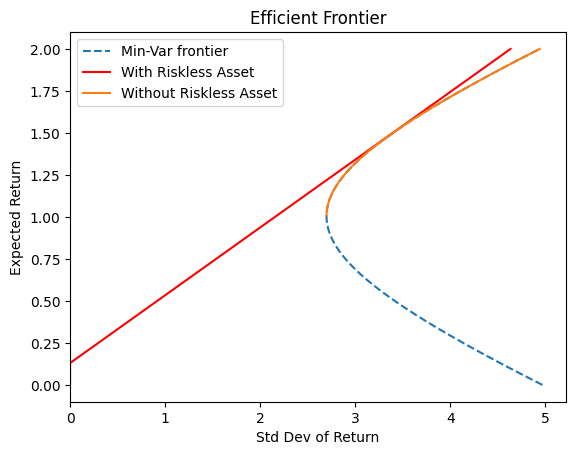

In [11]:
plt \
    .plot(min_variance_frontier['sd'], 
         min_variance_frontier['Rp'],
         linestyle = 'dashed',
         label = 'Min-Var frontier')

plt \
    .plot(efficient_frontier_riskless['sd'],
         efficient_frontier_riskless['Rp'],
         color = 'red',
         label = 'With Riskless Asset')

plt \
    .plot(efficient_min_variance_frontier['sd'], 
         efficient_min_variance_frontier['Rp'],
         label = 'Without Riskless Asset')
         
plt \
    .legend()

plt \
    .xlim(xmin = 0)

plt \
    .xlabel('Std Dev of Return')

plt \
    .ylabel('Expected Return')

plt \
    .title('Efficient Frontier')

print('Answer 4')
plt.show()

### 5. Briefly explain the economic significance and relevance of the efficient frontier to an investor.

Investors would choose a portfolio in the top half of the minimum-variance frontier as opposed to the bottom half because for each given level of risk in the bottom half, there exist a corresponding portfolio with a higher return in the top half. Hence, the top halve of the minimum-variance frontier is the efficient frontier. \
\
Investors will choose their optimal portfolio where their indifference curve is tangent to the frontier as this is where their expected utility is maximized.

### 6. Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios.

In [12]:
mean_ret_tangency_portfolio = \
    (alpha * riskfree - zeta) / (delta * riskfree - alpha)

risk_premium_tangency_portfolio = \
    mean_ret_tangency_portfolio - riskfree

variance_tangency_portfolio = \
    (zeta - 2 * alpha * riskfree + delta * riskfree ** 2) / (delta ** 2 * (riskfree - alpha / delta) ** 2)

Sharpe = \
    (zeta - 2 * alpha * riskfree + delta * riskfree**2) ** 0.5

a = \
    (
        zeta * np \
        .matmul(
            inv_V, 
            np.ones(shape = (inv_V.shape[0], 1))
            ) - alpha * np \
                .matmul(
                    inv_V, 
                    R
                    )
                ) / (zeta * delta - alpha ** 2)

b = \
    (
        delta * np \
        .matmul(
            inv_V, 
            R
            ) - alpha * np \
                .matmul(
                    inv_V, 
                    np.ones(shape = (inv_V.shape[0], 1))
                        )
                    ) / (zeta * delta - alpha ** 2)

weights = a + b * mean_ret_tangency_portfolio

print('Answer 6')
print('\nSharpe ratio of the tangency portfolio = ', round(Sharpe[0][0], 3))

print('\nPortfolio Weights: \n')

pd \
    .concat(
        [
            answer_1.reset_index(), 
            pd.DataFrame(weights)
        ],
            axis = 1) \
                .rename(columns = 
                        {0 : 'weights', 
                         'index' : 'Portfolios'}
        )

Answer 6

Sharpe ratio of the tangency portfolio =  0.404

Portfolio Weights: 



,Portfolios,mean,std,weights
0,NoDur,0.902833,3.345657,0.567972
1,Durbl,0.733333,8.361852,-0.214073
2,Manuf,1.012833,5.310270,0.714105
3,Enrgy,1.231167,6.081524,0.104087
4,HiTec,0.766250,5.381191,-0.363438
5,Telcm,0.881417,4.448284,-0.095463
6,Shops,0.916333,4.093786,0.991647
7,Hlth,0.783833,3.787172,0.075570
8,Utils,0.907167,3.701763,0.132643
9,Other,0.489083,5.582452,-0.913051


### 7. Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

The Tangency portolio is the optimal portfolio of risky assets as it has the highest Sharpe ratio of all the other possible risky portfolios, offering the highest possible reward per unit risk taken by the investor